In [1]:
# For Analysis 
import numpy as np 
import pandas as pd 
import geopandas as gpd 

# DateTime Format 
from datetime import datetime, timedelta, timezone

# Colors 
import calmap

# Grammar of graphics 
from plotnine import *

# 2D Plot 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

# Interactive Visualizations 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px 

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Data Import

In [3]:
# Import xlsx file and store each sheet in to a df list
xl_file = pd.ExcelFile("./data/data.xls",)
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}

In [4]:
# Data from each sheet can be accessed via key
keylist = list(dfs.keys())

In [5]:
# Examine the sheet name 
keylist[1:10]

['2020-03-10-06-00',
 '2020-03-10-04-00',
 '2020-03-10-02-00',
 '2020-03-10-00-30',
 '2020-03-10-00-00',
 '2020-03-09-22-30',
 '2020-03-09-21-00',
 '2020-03-09-19-00',
 '2020-03-09-18-00']

## Data Exploring

In [6]:
# Examine first few rows 
dfs[keylist[0]].head(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,3/10/2020 14:30,67760,3024,47741
1,Guangdong,Mainland China,3/10/2020 14:30,1353,8,1274
2,Zhejiang,Mainland China,3/10/2020 14:30,1215,1,1191
3,Shandong,Mainland China,3/10/2020 14:30,758,6,719
4,Henan,Mainland China,3/10/2020 14:30,1272,22,1247
5,Anhui,Mainland China,3/10/2020 14:30,990,6,984
6,Jiangxi,Mainland China,3/10/2020 14:30,935,1,927
7,Hunan,Mainland China,3/10/2020 14:30,1018,4,990
8,Heilongjiang,Mainland China,3/10/2020 14:30,481,13,434
9,Sichuan,Mainland China,3/10/2020 14:30,539,3,478


In [7]:
# Check datamatrix 
dfs[keylist[0]].shape

(191, 6)

In [8]:
# Basic info about dataset 
dfs[keylist[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
Province/State    85 non-null object
Country/Region    191 non-null object
Last Update       191 non-null object
Confirmed         191 non-null int64
Deaths            191 non-null int64
Recovered         191 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.1+ KB


In [9]:
# Numerical summary of dataset
dfs[keylist[0]].describe()

,Confirmed,Deaths,Recovered
count,191.000000,191.000000,191.000000
mean,620.099476,22.329843,340.722513
std,5006.670536,224.073252,3460.555515
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000
75%,101.500000,1.000000,11.000000
max,67760.000000,3024.000000,47741.000000


## Data Cleaning

In [10]:
# Data Cleaning 
for key, df in dfs.items():
    dfs[key].loc[:, 'Confirmed'].fillna(value=0, inplace=True)
    dfs[key].loc[:, 'Deaths'].fillna(value=0, inplace=True)
    dfs[key].loc[:, 'Recovered'].fillna(value=0, inplace=True)
   
    # Convert cases into integer
    dfs[key] = dfs[key].astype({'Confirmed':'int64', 'Deaths':'int64', 'Recovered':'int64'})
    
    # Replace 
    dfs[key] = dfs[key].replace({'Country/Region': 'Mainland China'}, 'China')
    dfs[key] = dfs[key].replace({'Country/Region': 'Queensland'}, 'Brisbane')
    dfs[key] = dfs[key].replace({'Country/Region': 'New South Wales'}, 'Sydney')
    dfs[key] = dfs[key].replace({'Country/Region': 'Victoria'}, 'Melbourne')
    dfs[key]=dfs[key].replace({'Province/State':'South Australia'}, 'Adelaide')

    # DateTime Format 
    dfs[key]['Last Update'] = '0' + dfs[key]['Last Update']
    dfs[key]['Date_last_updated'] = [datetime.strptime(d, '%m/%d/%Y %H:%M') for d in dfs[key]['Last Update']]

In [11]:
# Take a look at cleaned data 
dfs[keylist[0]].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date_last_updated
0,Hubei,China,03/10/2020 14:30,67760,3024,47741,2020-03-10 14:30:00
1,Guangdong,China,03/10/2020 14:30,1353,8,1274,2020-03-10 14:30:00
2,Zhejiang,China,03/10/2020 14:30,1215,1,1191,2020-03-10 14:30:00
3,Shandong,China,03/10/2020 14:30,758,6,719,2020-03-10 14:30:00
4,Henan,China,03/10/2020 14:30,1272,22,1247,2020-03-10 14:30:00


## Creating DataFrame for Cases

In [12]:
# Total No. of cases 
confirmed_cases = dfs[keylist[0]]['Confirmed'].sum()
deaths_cases = dfs[keylist[0]]['Deaths'].sum()
recovered_cases = dfs[keylist[0]]['Recovered'].sum()
active_cases = 

In [13]:
# Print the Total no. of cases in first dataset
print("No. of Confirmed Cases = ", confirmed_cases)
print("No. of Death Cases = ", deaths_cases)
print("No. of Recovered Cases = ", recovered_cases)

No. of Confirmed Cases =  118439
No. of Death Cases =  4265
No. of Recovered Cases =  65078


## Confirmed Cases

In [17]:
# Construct new dataframe called df_confirmed for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Confirmed'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Confirmed':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Confirmed'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Confirmed'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_confirmed = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_confirmed['date_day']=[d.date() for d in df_confirmed['Date']]
df_confirmed=df_confirmed.groupby(by=df_confirmed['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_confirmed['Total']=df_confirmed['Mainland China']+df_confirmed['Other locations']
df_confirmed=df_confirmed.reset_index(drop=True)

In [18]:
# Examine confirmed dataset
df_confirmed.head()

,Date,Mainland China,Other locations,Total
0,2020-03-10 14:30:00,80754,37685,118439
1,2020-03-09 22:30:00,80754,33717,114471
2,2020-03-08 22:00:00,80735,29361,110096
3,2020-03-07 22:00:00,80695,25501,106196
4,2020-03-06 20:30:00,80651,21391,102042


## Recovered Cases

In [24]:
# Construct new dataframe called df_recovered for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Recovered'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Recovered':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Recovered', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Recovered'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Recovered'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_recovered = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_recovered['date_day']=[d.date() for d in df_recovered['Date']]
df_recovered=df_recovered.groupby(by=df_recovered['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_recovered['Total']=df_recovered['Mainland China']+df_recovered['Other locations']
df_recovered=df_recovered.reset_index(drop=True)

In [25]:
df_recovered.head()

,Date,Mainland China,Other locations,Total
0,2020-03-10 14:30:00,60096,4982,65078
1,2020-03-09 22:30:00,59884,4168,64052
2,2020-03-08 22:00:00,58587,3669,62256
3,2020-03-07 22:00:00,57053,3068,60121
4,2020-03-06 20:30:00,55392,2184,57576


## Deaths Cases

In [26]:
# Construct new dataframe called df_deaths for line plot 
DateList = []
ChinaList =[]
OtherList = []

for key, df in dfs.items():
    # Group by Country/Region and Sum
    dfTemp = df.groupby(['Country/Region'])['Deaths'].agg(np.sum)
    # Make a df with dfTemp index and values and store in dfTemp
    dfTemp = pd.DataFrame({'Code':dfTemp.index, 'Deaths':dfTemp.values})
    # Sorting values by Confirmed 
    dfTemp = dfTemp.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
    # Append dfTemp to DateList in df[0]
    DateList.append(df['Date_last_updated'][0])
    # Append dfTemp to ChinaList df[0]
    ChinaList.append(dfTemp['Deaths'][0])
    # Append dfTemp to Otherlist df[1:]
    OtherList.append(dfTemp['Deaths'][1:].sum())

# Make Confirmed dataframe with DateList, ChinaList, OtherList 
# Column name Date, Mainland China, Other Locations 
df_deaths = pd.DataFrame({'Date':DateList,
                             'Mainland China':ChinaList,
                             'Other locations':OtherList})  


# Sorting and index reset 
df_deaths['date_day']=[d.date() for d in df_deaths['Date']]
df_deaths=df_deaths.groupby(by=df_deaths['date_day'], sort=False).transform(max).drop_duplicates(['Date'])
df_deaths['Total']=df_deaths['Mainland China']+df_deaths['Other locations']
df_deaths=df_deaths.reset_index(drop=True)

In [27]:
df_deaths.head()

,Date,Mainland China,Other locations,Total
0,2020-03-10 14:30:00,3136,1129,4265
1,2020-03-09 22:30:00,3136,890,4026
2,2020-03-08 22:00:00,3119,711,3830
3,2020-03-07 22:00:00,3097,502,3599
4,2020-03-06 20:30:00,3070,419,3489


## Linear & Logarithmic Line Plot for Total Cases, Deaths, Recovered(Worlwide)

In [30]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-ticks',
 'fast',
 'seaborn-bright',
 'seaborn-talk',
 'tableau-colorblind10',
 'ggplot',
 'dark_background',
 'seaborn-deep',
 'seaborn-white',
 'grayscale',
 'seaborn-dark',
 'bmh',
 'seaborn-notebook',
 'classic',
 'seaborn-pastel',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'seaborn-poster']

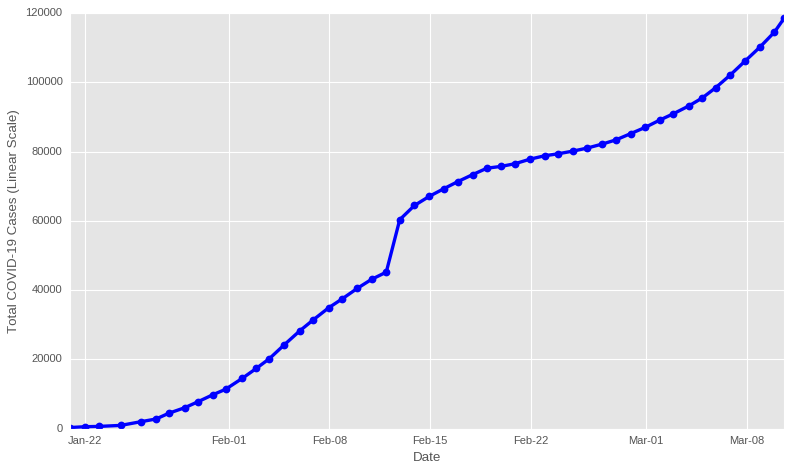

In [64]:
# Linear Scale for Total Confrmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_yscale('linear')
# ax.set_title('Total Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases (Linear Scale)')
plt.tight_layout()
plt.show()

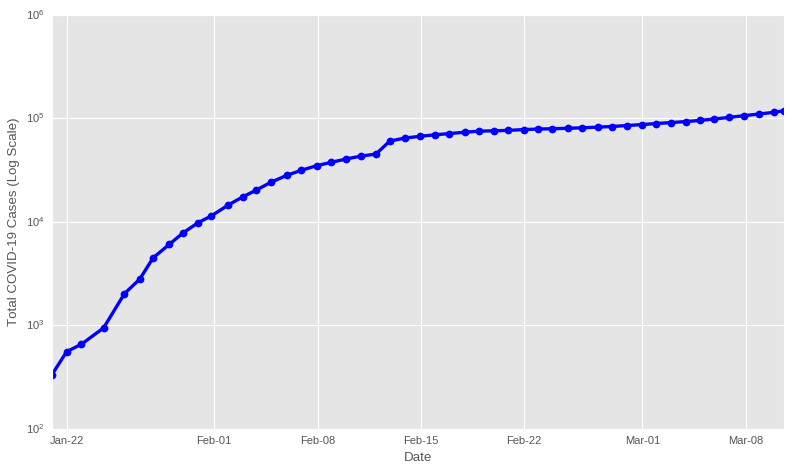

In [65]:
# Log Scale for Total Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log') 
# ax.set_title('Total Cases')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases (Log Scale)')
plt.tight_layout()
plt.show()

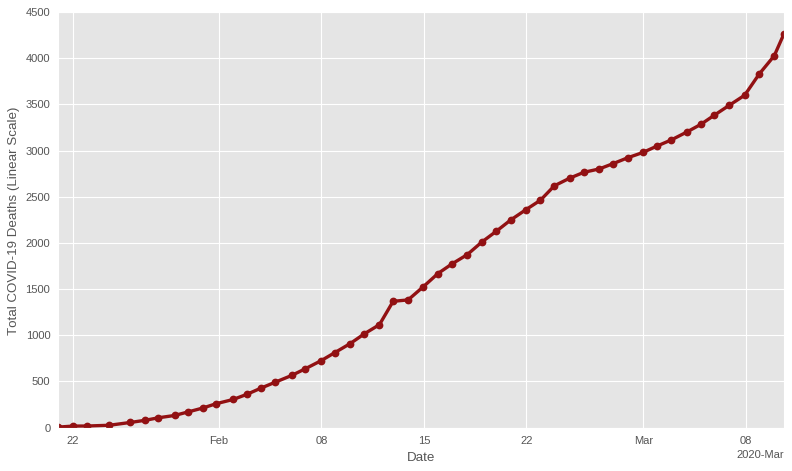

In [42]:
# Linear Scale for Total Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_deaths['Total'], marker='o', color='#921113', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear')
# ax.set_title('Total Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths (Linear Scale)')
plt.tight_layout()
plt.show()

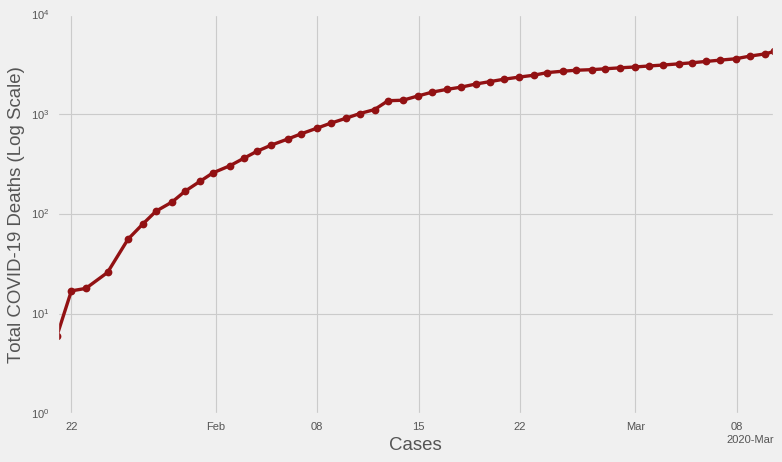

In [44]:
# Log Scale for Total Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_deaths['Total'], marker='o', color='#921113', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log')
# ax.set_title('Total Deaths')
ax.set_xlabel('Cases')
ax.set_ylabel('Total COVID-19 Deaths (Log Scale)')
plt.tight_layout()
plt.show()

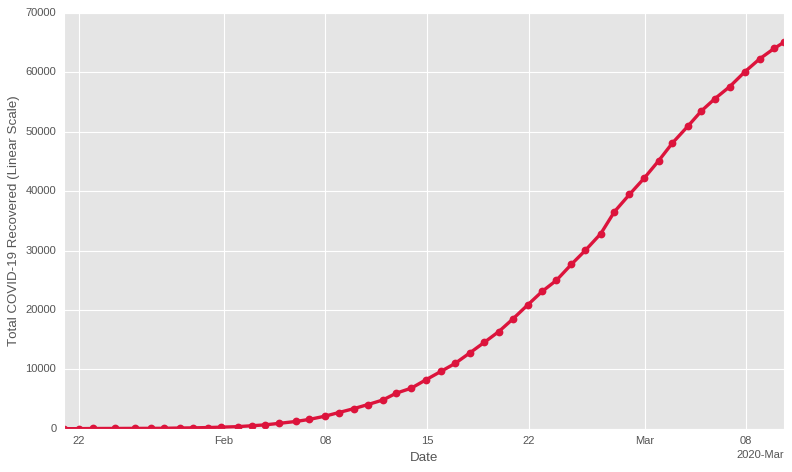

In [63]:
# Linear Scale for Total Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear')
# ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')
plt.tight_layout()
plt.show()

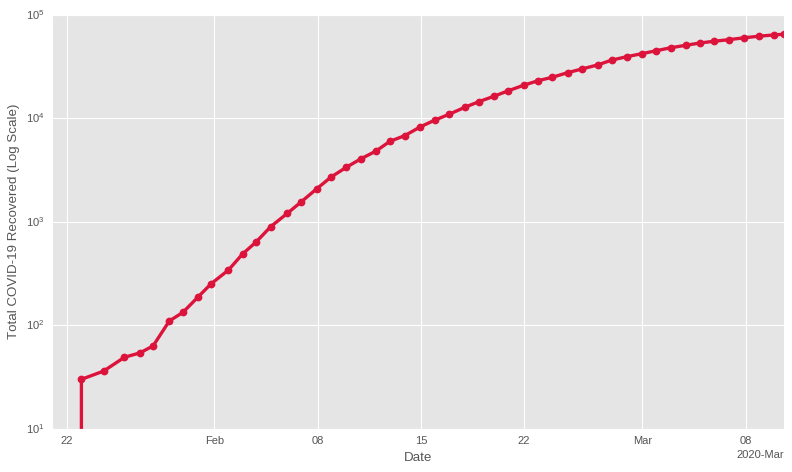

In [47]:
# Log Scale 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
# ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Log Scale)')
plt.tight_layout()
plt.show()

## Linear & Logarithmic Line Plot for Total Cases, Deaths, Recovered(China)

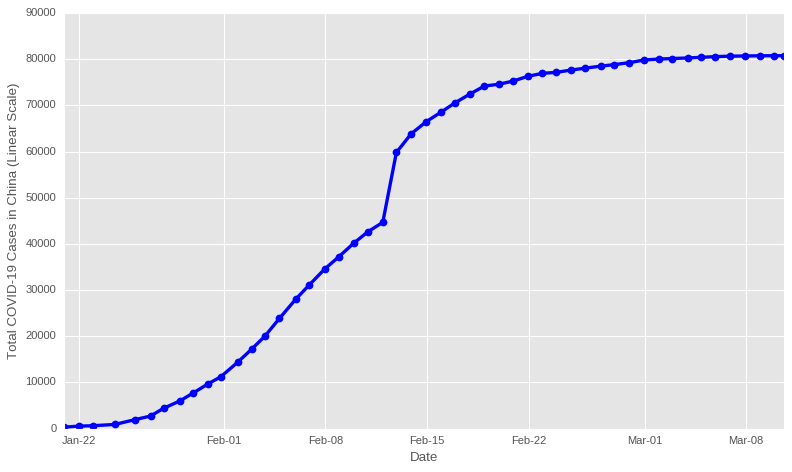

In [67]:
# Linear Scale for Total Confirmed Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='blue', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date') 
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

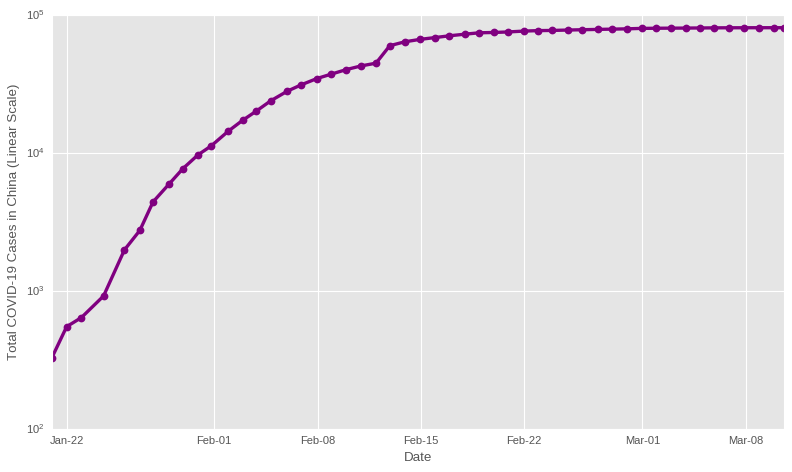

In [68]:
# Log Scale for Total Confirmed Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='purple', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date') 
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

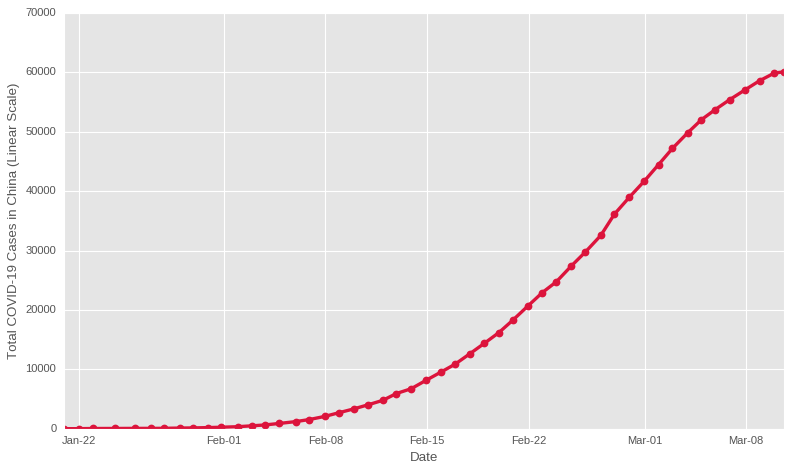

In [66]:
# Linear Scale for Total Recovered Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Linear Scale)')
plt.tight_layout()
plt.show()

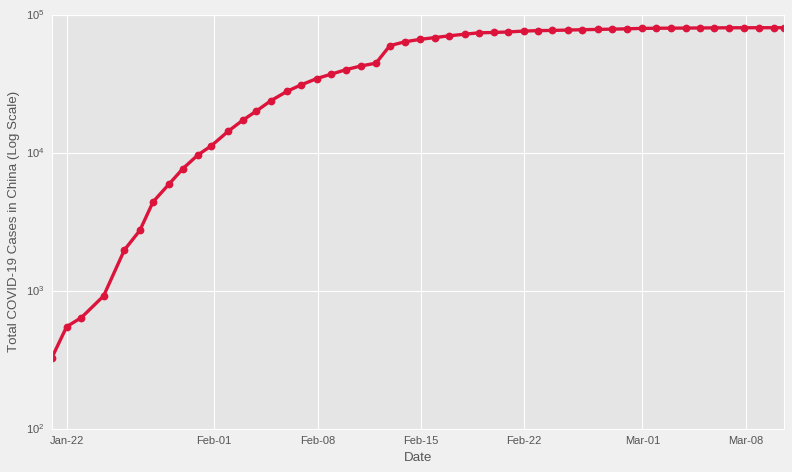

In [59]:
# Log Scale for Total Recovered Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

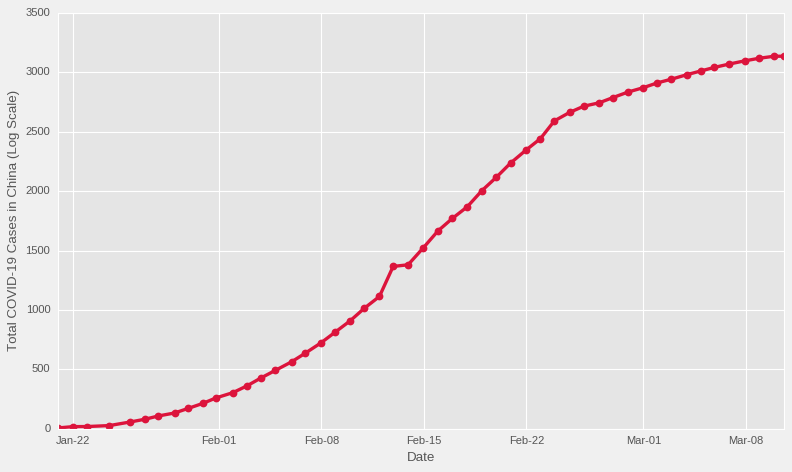

In [61]:
# Linear Scale for Total Deaths Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

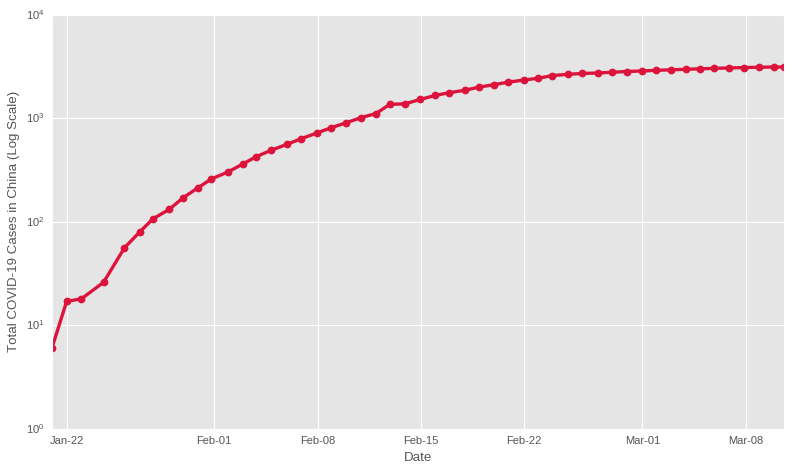

In [62]:
# Log Scale for Total Deaths Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3) 
# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Cases in China (Log Scale)')
plt.tight_layout()
plt.show()

## Comparison

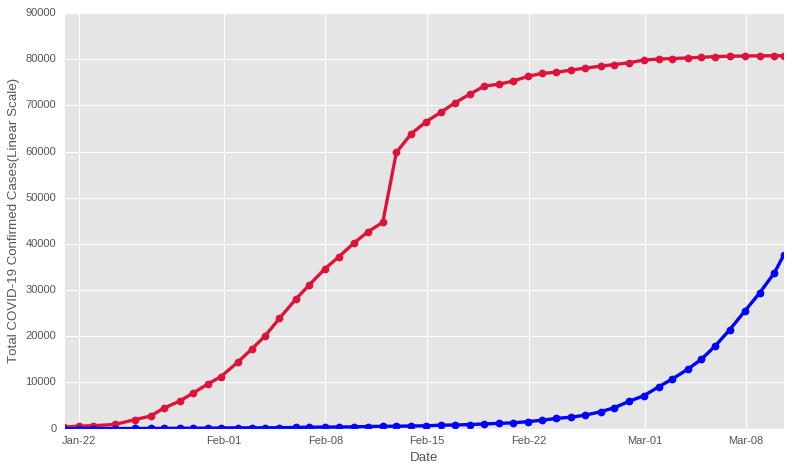

In [79]:
# Linear Scale for Comaprison Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Confirmed Cases(Linear Scale)')
plt.tight_layout()
plt.show()

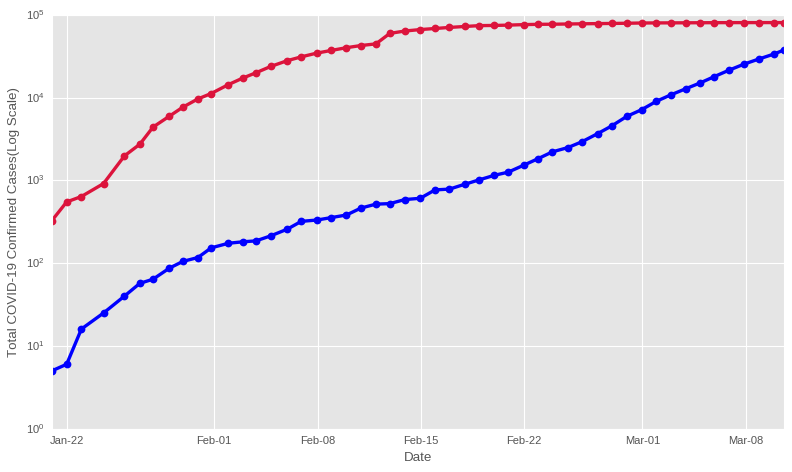

In [80]:
# Log Scale for Comparison Confirmed Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Confirmed Cases(Log Scale)')
plt.tight_layout()
plt.show()

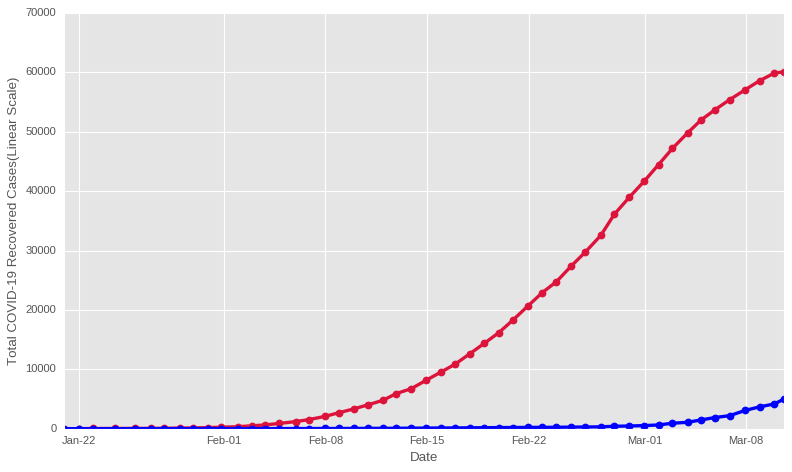

In [82]:
# Linear Scale for Comparison Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered Cases(Linear Scale)')
plt.tight_layout()
plt.show()

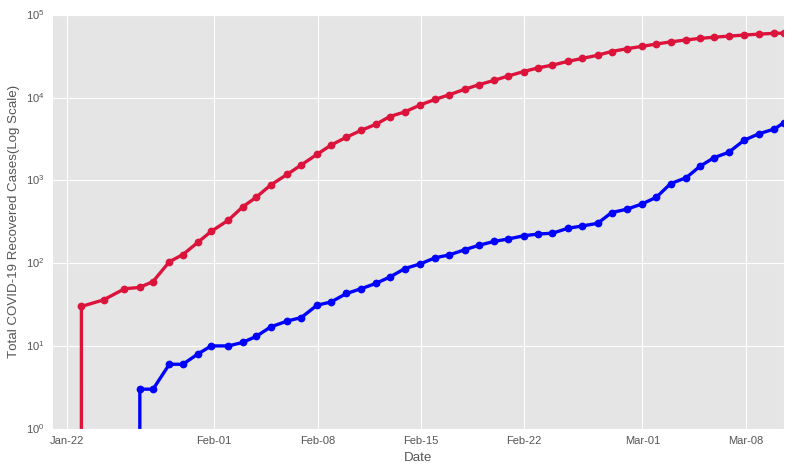

In [83]:
# Log Scale for Comparison Recovered Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_recovered['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered Cases(Log Scale)')
plt.tight_layout()
plt.show()

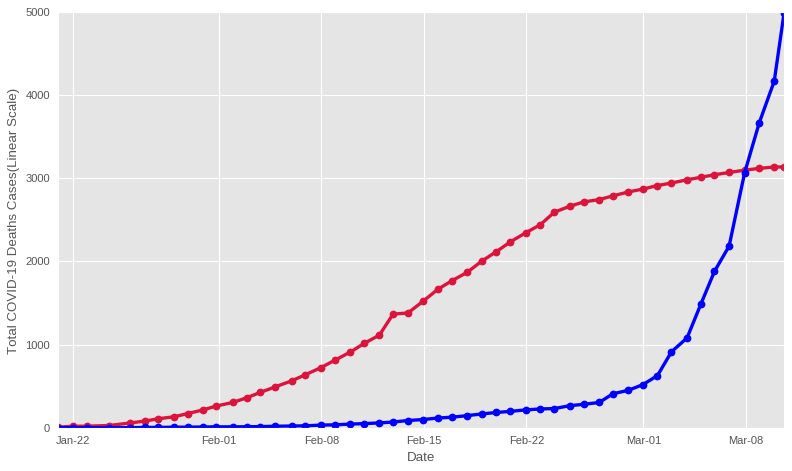

In [85]:
# Linear Scale for Comparison Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths Cases(Linear Scale)')
plt.tight_layout()
plt.show()

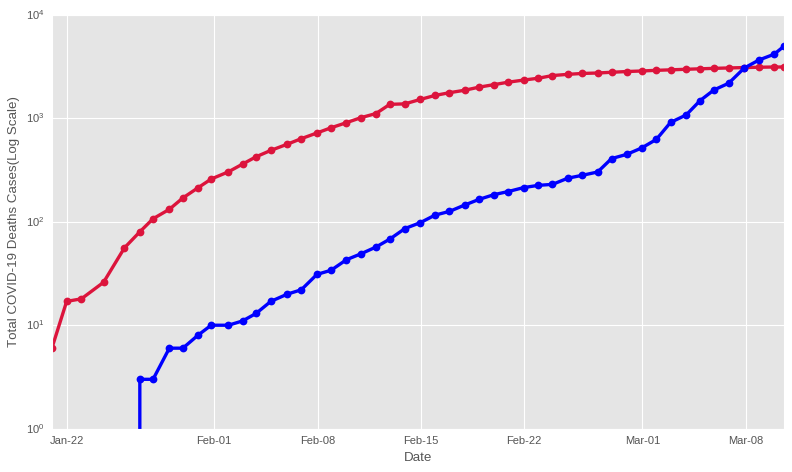

In [86]:
# Linear Scale for Comparison Deaths Cases 
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_deaths['Mainland China'], marker='o', color='crimson', linewidth=3, label="Mainland China") 
ax.plot(df_confirmed['Date'], df_recovered['Other locations'], marker='o', color='blue', linewidth=3, label="Other Region") 

# date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))  
ax.set_yscale('log')
# ax.set_title('Confirmed Cases in China')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths Cases(Log Scale)')
plt.tight_layout()
plt.show()

## Subplots 

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_recovered['Total'], marker='o', color='crimson', linewidth=3) 
date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')
plt.tight_layout()
plt.show()

In [ ]:
fig , ax = plt.subplot(121)
ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%b %d') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('linear') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Linear Scale)')


ax.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%b %d') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax.set_yscale('log') 
ax.set_title('Total Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Recovered (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig1 = plt.figure(figsize=(10,6))
fig2 = plt.figure(figsize=(10,6))

ax1.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%Y-%m-%d') for d in df_confirmed['Date']]
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax1.set_yscale('linear') 
ax1.set_title('Total Recovered')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total COVID-19 Recovered (Linear Scale)')

ax2.plot(df_confirmed['Date'], df_confirmed['Total'], marker='o', color='blue', linewidth=3) 
date = [datetime.strftime(d, '%Y-%m-%d') for d in df_confirmed['Date']]
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date))  
ax2.set_yscale('log') 
ax2.set_title('Total Recovered')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total COVID-19 Recovered (Log Scale)')


plt.tight_layout()

plt.show()

In [ ]:
print(plt.style.available)

In [ ]:
# Linear Scale for Total Deaths Cases in China 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'],  label="Mainland China", marker='o', color='#921113', linewidth=3) 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], label="Other Region", marker=".", color='#eb5254', linewidth=3)
date = [datetime.strftime(d, '%b %d %Y') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date)) 
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in Mainland China and Other Region')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()9
# plt.savefig("plot.tiff")
plt.show()

In [ ]:
# Linear Scale 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'],  label="Mainland China", marker='o', color='#921113', linewidth=3) 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], label="Other Region", marker=".", color='#eb5254', linewidth=3)
date = [datetime.strftime(d, '%b %d %Y') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date)) 
ax.set_yscale('linear')
# ax.set_title('Confirmed Cases in Mainland China and Other Region')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()9
# plt.savefig("plot.tiff")
plt.show()

In [ ]:
# Log scale 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_confirmed['Date'], df_confirmed['Mainland China'],  label="Mainland China", marker='o') 
ax.plot(df_confirmed['Date'], df_confirmed['Other locations'], label="Other Region", marker="o")
date = [datetime.strftime(d, '%b %d %Y') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(date)) 
ax.set_title('Confirmed Cases in Mainland China and Other Region')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.set_yscale('log') 
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Line plot for confirmed cases
# Set up tick scale based on confirmed case number
tickList = list(np.arange(0, df_confirmed['Mainland China'].max()+1000, 2000))

# Create empty figure canvas
fig_confirmed = go.Figure()
# Add trace to the figure
fig_confirmed.add_trace(go.Scatter(x=df_confirmed['Date'], y=df_confirmed['Mainland China'],
                                   mode='lines+markers',
                                   name='Mainland China',
                                   line=dict(color='#921113', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#921113')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']],
                                   hovertext=['Mainland China confirmed<br>{:,d} cases<br>'.format(i) for i in df_confirmed['Mainland China']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
fig_confirmed.add_trace(go.Scatter(x=df_confirmed['Date'], y=df_confirmed['Other locations'],
                                   mode='lines+markers',
                                   name='Other Region',
                                   line=dict(color='#eb5254', width=3),
                                   marker=dict(size=8, color='#f4f4f2',
                                               line=dict(width=1,color='#eb5254')),
                                   text=[datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']],
                                   hovertext=['Other locations confirmed<br>{:,d} cases<br>'.format(i) for i in df_confirmed['Other locations']],
                                   hovertemplate='<b>%{text}</b><br></br>'+
                                                 '%{hovertext}'+
                                                 '<extra></extra>'))
# Customise layout
fig_confirmed.update_layout(
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=10,
        t=5,
        pad=0
    ),
    yaxis=dict(
        showline=True, linecolor='#272e3e',
        zeroline=False,
        gridcolor='#cbd2d3',
        gridwidth = .1,
        tickmode='array',
        # Set tick range based on the maximum number
        tickvals=tickList,
        # Set tick label accordingly
        ticktext=["{:.0f}k".format(i/1000) for i in tickList]
    ),
#    yaxis_title="Total Confirmed Case Number",
    xaxis=dict(
        showline=True, linecolor='#272e3e',
        gridcolor='#cbd2d3',
        gridwidth = .1,
        zeroline=False
    ),
    xaxis_tickformat='%b %d',
    hovermode = 'x',
    legend_orientation="h",
#    legend=dict(x=.35, y=-.05),
    plot_bgcolor='#f4f4f2',
    paper_bgcolor='#cbd2d3',
    font=dict(color='#292929')
)

fig_confirmed.show()

In [ ]:
# Linear Scale 
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(111)
ax.plot(df_deaths['Date'], df_deaths['Total'], marker='o', color='#921113', linewidth=3) 
#date = [datetime.strftime(d, '%b %d %Y AEDT') for d in df_confirmed['Date']]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
ax.set_yscale('linear')
ax.set_title('Total Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Total COVID-19 Deaths (Linear Scale)')
plt.tight_layout()
plt.show()

- Data Source-https://github.com/Perishleaf/data-visualisation-scripts/blob/master/dash-2019-coronavirus/data.xls